In [ ]:
import psutil
import time
import csv
from datetime import datetime
import pandas as pd

def get_battery_status():
    battery = psutil.sensors_battery()
    if battery is not None:
        return battery.percent
    return None

def get_system_usage():
    cpu_usage = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()
    disk_info = psutil.disk_usage('/')
    network_info = psutil.net_io_counters()

    system_usage = {
        'cpu_usage_percent': cpu_usage,
        'memory_total': memory_info.total,
        'memory_available': memory_info.available,
        'memory_percent': memory_info.percent,
        'disk_total': disk_info.total,
        'disk_used': disk_info.used,
        'disk_free': disk_info.free,
        'disk_percent': disk_info.percent,
        'bytes_sent': network_info.bytes_sent,
        'bytes_recv': network_info.bytes_recv
    }

    return system_usage

def get_app_usage():
    app_usage = []
    for proc in psutil.process_iter(['pid', 'name', 'cpu_percent']):
        try:
            app_usage.append({
                'pid': proc.info['pid'],
                'name': proc.info['name'],
                'cpu_percent': proc.info['cpu_percent'],
                'memory_percent': proc.memory_percent(),
                'cpu_time': proc.cpu_times(),
                'num_threads': proc.num_threads()
            })
        except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
            pass
    return app_usage

def main():
    with open('/content/initial 100% data.csv', 'w', newline='') as csvfile:
        fieldnames = [
            'timestamp', 'battery_percent',
            'cpu_usage_percent', 'memory_total', 'memory_available', 'memory_percent',
            'disk_total', 'disk_used', 'disk_free', 'disk_percent', 'bytes_sent', 'bytes_recv',
            'pid', 'app_name', 'app_cpu_percent', 'app_memory_percent', 'app_cpu_time', 'app_num_threads'
        ]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        row_count = 0
        while row_count < 500:  # Ensure at least 500 rows are collected
            timestamp = datetime.now().isoformat()
            battery_percent = get_battery_status()
            system_usage = get_system_usage()
            app_usage = get_app_usage()

            for app in app_usage:
                writer.writerow({
                    'timestamp': timestamp,
                    'battery_percent': battery_percent if battery_percent is not None else 'N/A',
                    'cpu_usage_percent': system_usage['cpu_usage_percent'],
                    'memory_total': system_usage['memory_total'],
                    'memory_available': system_usage['memory_available'],
                    'memory_percent': system_usage['memory_percent'],
                    'disk_total': system_usage['disk_total'],
                    'disk_used': system_usage['disk_used'],
                    'disk_free': system_usage['disk_free'],
                    'disk_percent': system_usage['disk_percent'],
                    'bytes_sent': system_usage['bytes_sent'],
                    'bytes_recv': system_usage['bytes_recv'],
                    'pid': app['pid'],
                    'app_name': app['name'],
                    'app_cpu_percent': app['cpu_percent'],
                    'app_memory_percent': app['memory_percent'],
                    'app_cpu_time': app['cpu_time'],
                    'app_num_threads': app['num_threads']
                })
                row_count += 1
            time.sleep(60)  # Collect data every 60 seconds

if __name__ == '__main__':
    main()


In [31]:
import pandas as pd
data="/content/initial 100% data.csv"
df=pd.read_csv(data)
df

,timestamp,battery_percent,cpu_usage_percent,memory_total,memory_available,memory_percent,disk_total,disk_used,disk_free,disk_percent,bytes_sent,bytes_recv,pid,app_name,app_cpu_percent,app_memory_percent,app_cpu_time,app_num_threads
0,2024-07-14T18:54:20.805,27,25.4,16876888064,281837568,98.3,255529578496,255414697984,114880512,100,85919102,494024912,0,System Idle Process,0.0,0.000049,"pcputimes(user=0.0, system=451239.90624999994,...",24
1,2024-07-14T18:54:20.805,27,25.4,16876888064,281837568,98.3,255529578496,255414697984,114880512,100,85919102,494024912,4,System,0.0,0.026964,"pcputimes(user=0.0, system=1034.796875, childr...",355
2,2024-07-14T18:54:20.805,27,25.4,16876888064,281837568,98.3,255529578496,255414697984,114880512,100,85919102,494024912,140,NaN,0.0,0.287016,"pcputimes(user=0.0, system=0.0, children_user=...",0
3,2024-07-14T18:54:20.805,27,25.4,16876888064,281837568,98.3,255529578496,255414697984,114880512,100,85919102,494024912,172,Registry,0.0,0.461225,"pcputimes(user=0.0, system=1.640625, children_...",4
4,2024-07-14T18:54:20.805,27,25.4,16876888064,281837568,98.3,255529578496,255414697984,114880512,100,85919102,494024912,640,python.exe,0.0,0.832166,"pcputimes(user=0.671875, system=0.515625, chil...",18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,2024-07-14T18:55:47.340,25,18.8,16876888064,832086016,95.1,255529578496,255476084736,53493760,100,86450395,524925992,38664,brave.exe,0.1,0.228380,"pcputimes(user=0.75, system=0.640625, children...",18
824,2024-07-14T18:55:47.340,25,18.8,16876888064,832086016,95.1,255529578496,255476084736,53493760,100,86450395,524925992,38776,brave.exe,3.3,1.343993,"pcputimes(user=7.890625, system=6.65625, child...",47
825,2024-07-14T18:55:47.340,25,18.8,16876888064,832086016,95.1,255529578496,255476084736,53493760,100,86450395,524925992,38820,brave.exe,0.0,0.052569,"pcputimes(user=0.015625, system=0.015625, chil...",8
826,2024-07-14T18:55:47.340,25,18.8,16876888064,832086016,95.1,255529578496,255476084736,53493760,100,86450395,524925992,38828,brave.exe,0.0,0.133072,"pcputimes(user=0.03125, system=0.125, children...",10


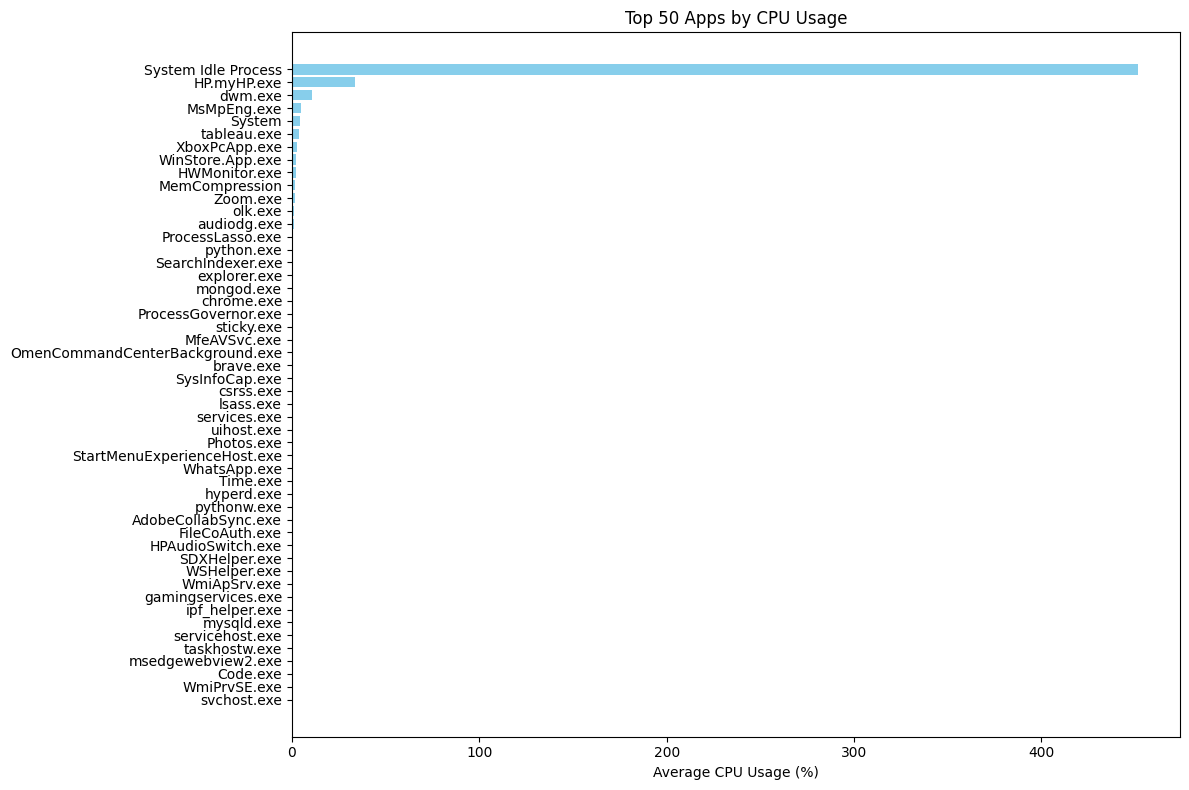

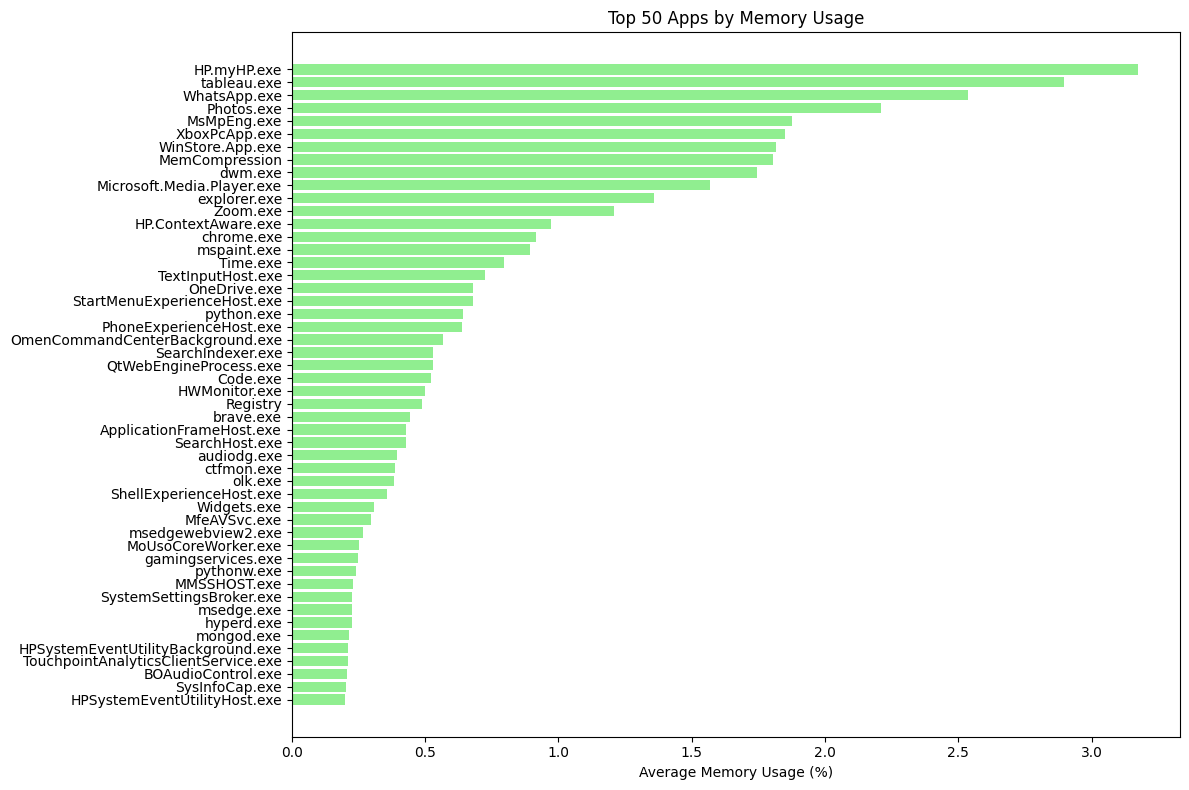

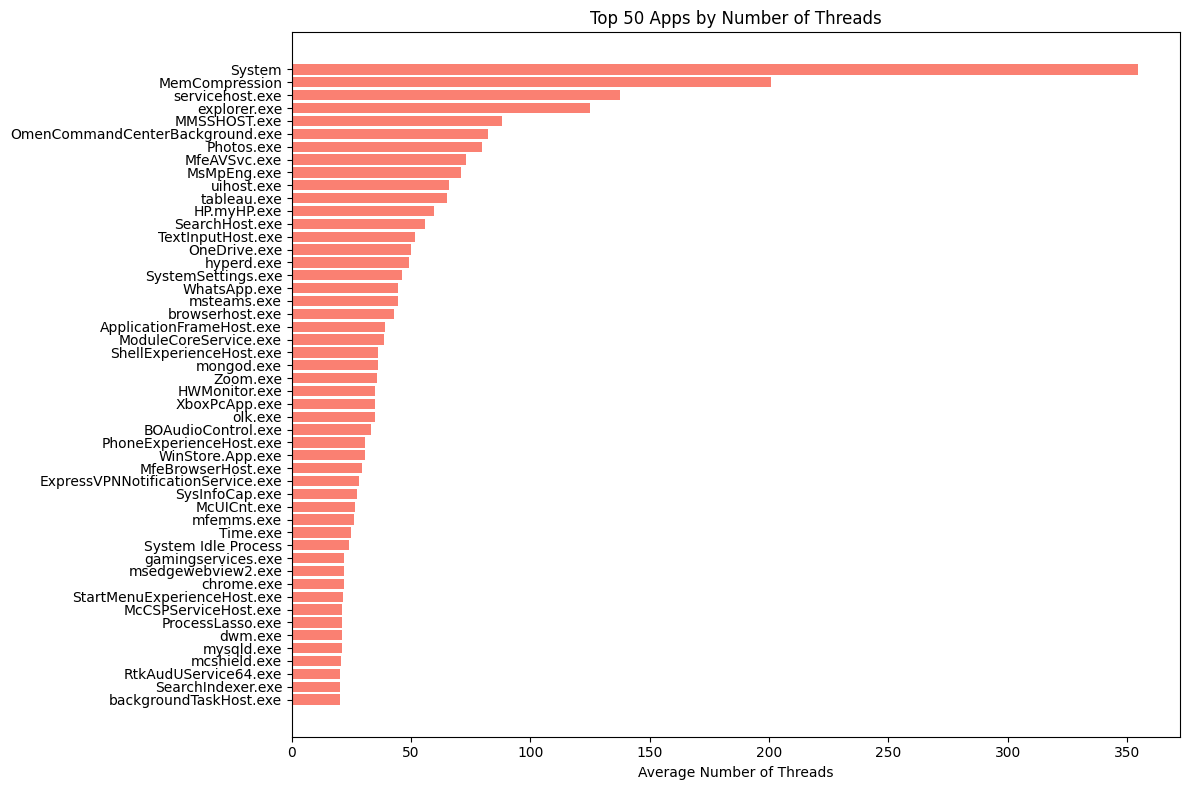

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV into a pandas DataFrame
df = pd.read_csv('/content/initial 100% data.csv')

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Group by application and calculate average CPU and memory usage
app_stats = df.groupby('app_name').agg({
    'app_cpu_percent': 'mean',
    'app_memory_percent': 'mean',
    'app_num_threads': 'mean'
}).reset_index()

# Sort by CPU usage to find top 50 apps
top_50_cpu = app_stats.nlargest(50, 'app_cpu_percent')

# Sort by memory usage to find top 50 apps
top_50_memory = app_stats.nlargest(50, 'app_memory_percent')

# Plotting top 50 apps by CPU usage
plt.figure(figsize=(12, 8))
plt.barh(top_50_cpu['app_name'], top_50_cpu['app_cpu_percent'], color='skyblue')
plt.xlabel('Average CPU Usage (%)')
plt.title('Top 50 Apps by CPU Usage')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest usage at the top
plt.tight_layout()
plt.show()

# Plotting top 50 apps by memory usage
plt.figure(figsize=(12, 8))
plt.barh(top_50_memory['app_name'], top_50_memory['app_memory_percent'], color='lightgreen')
plt.xlabel('Average Memory Usage (%)')
plt.title('Top 50 Apps by Memory Usage')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest usage at the top
plt.tight_layout()
plt.show()

# Optional: Plotting top 50 apps by number of threads
top_50_threads = app_stats.nlargest(50, 'app_num_threads')
plt.figure(figsize=(12, 8))
plt.barh(top_50_threads['app_name'], top_50_threads['app_num_threads'], color='salmon')
plt.xlabel('Average Number of Threads')
plt.title('Top 50 Apps by Number of Threads')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest number of threads at the top
plt.tight_layout()
plt.show()


In [ ]:
import psutil
import time
import csv
from datetime import datetime

def get_battery_status():
    battery = psutil.sensors_battery()
    if battery is not None:
        return battery.percent
    return None

def get_system_usage():
    cpu_usage = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()
    disk_info = psutil.disk_usage('/')
    network_info = psutil.net_io_counters()

    system_usage = {
        'cpu_usage_percent': cpu_usage,
        'memory_total': memory_info.total,
        'memory_available': memory_info.available,
        'memory_percent': memory_info.percent,
        'disk_total': disk_info.total,
        'disk_used': disk_info.used,
        'disk_free': disk_info.free,
        'disk_percent': disk_info.percent,
        'bytes_sent': network_info.bytes_sent,
        'bytes_recv': network_info.bytes_recv
    }

    return system_usage

def get_app_usage():
    app_usage = []
    for proc in psutil.process_iter(['pid', 'name', 'cpu_percent']):
        try:
            app_usage.append({
                'pid': proc.info['pid'],
                'name': proc.info['name'],
                'cpu_percent': proc.info['cpu_percent'],
                'memory_percent': proc.memory_percent(),
                'cpu_time': proc.cpu_times(),
                'num_threads': proc.num_threads()
            })
        except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
            pass
    return app_usage

def main():
    with open('/content/70% limit data.csv', 'w', newline='') as csvfile:
        fieldnames = [
            'timestamp', 'battery_percent',
            'cpu_usage_percent', 'memory_total', 'memory_available', 'memory_percent',
            'disk_total', 'disk_used', 'disk_free', 'disk_percent', 'bytes_sent', 'bytes_recv',
            'pid', 'app_name', 'app_cpu_percent', 'app_memory_percent', 'app_cpu_time', 'app_num_threads'
        ]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        row_count = 0
        while row_count < 500:  # Ensure at least 500 rows are collected
            # Check the overall CPU usage
            system_cpu_usage = psutil.cpu_percent(interval=1)
            if system_cpu_usage > 70:
                print(f"CPU usage is high: {system_cpu_usage}%. Sleeping to reduce load...")
                time.sleep(10)  # Sleep for 10 seconds to reduce CPU load
                continue

            timestamp = datetime.now().isoformat()
            battery_percent = get_battery_status()
            system_usage = get_system_usage()
            app_usage = get_app_usage()

            for app in app_usage:
                writer.writerow({
                    'timestamp': timestamp,
                    'battery_percent': battery_percent if battery_percent is not None else 'N/A',
                    'cpu_usage_percent': system_usage['cpu_usage_percent'],
                    'memory_total': system_usage['memory_total'],
                    'memory_available': system_usage['memory_available'],
                    'memory_percent': system_usage['memory_percent'],
                    'disk_total': system_usage['disk_total'],
                    'disk_used': system_usage['disk_used'],
                    'disk_free': system_usage['disk_free'],
                    'disk_percent': system_usage['disk_percent'],
                    'bytes_sent': system_usage['bytes_sent'],
                    'bytes_recv': system_usage['bytes_recv'],
                    'pid': app['pid'],
                    'app_name': app['name'],
                    'app_cpu_percent': app['cpu_percent'],
                    'app_memory_percent': app['memory_percent'],
                    'app_cpu_time': app['cpu_time'],
                    'app_num_threads': app['num_threads']
                })
                row_count += 1
            time.sleep(60)  # Collect data every 60 seconds

if __name__ == '__main__':
    main()


In [33]:
data="/content/70% limit data.csv"
df1=pd.read_csv(data)
df1

,timestamp,battery_percent,cpu_usage_percent,memory_total,memory_available,memory_percent,disk_total,disk_used,disk_free,disk_percent,bytes_sent,bytes_recv,pid,app_name,app_cpu_percent,app_memory_percent,app_cpu_time,app_num_threads
0,2024-07-14T18:58:43.066,24,5.6,16876888064,856207360,94.9,255529578496,255493275648,36302848,100,87456137,544931034,0,System Idle Process,1035.1,0.000049,"pcputimes(user=0.0, system=453839.57812499994,...",24
1,2024-07-14T18:58:43.066,24,5.6,16876888064,856207360,94.9,255529578496,255493275648,36302848,100,87456137,544931034,4,System,4.5,0.023809,"pcputimes(user=0.0, system=1050.59375, childre...",355
2,2024-07-14T18:58:43.066,24,5.6,16876888064,856207360,94.9,255529578496,255493275648,36302848,100,87456137,544931034,140,NaN,0.0,0.287016,"pcputimes(user=0.0, system=0.0, children_user=...",0
3,2024-07-14T18:58:43.066,24,5.6,16876888064,856207360,94.9,255529578496,255493275648,36302848,100,87456137,544931034,172,Registry,0.0,0.471952,"pcputimes(user=0.0, system=1.6875, children_us...",4
4,2024-07-14T18:58:43.066,24,5.6,16876888064,856207360,94.9,255529578496,255493275648,36302848,100,87456137,544931034,640,python.exe,0.0,0.832166,"pcputimes(user=0.6875, system=0.515625, childr...",18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,2024-07-14T18:59:57.463,25,10.5,16876888064,969068544,94.3,255529578496,255493537792,36040704,100,87661194,545098640,38664,brave.exe,0.0,0.228792,"pcputimes(user=0.765625, system=0.640625, chil...",19
814,2024-07-14T18:59:57.463,25,10.5,16876888064,969068544,94.3,255529578496,255493537792,36040704,100,87661194,545098640,38776,brave.exe,0.1,1.286595,"pcputimes(user=8.328125, system=7.015625, chil...",46
815,2024-07-14T18:59:57.463,25,10.5,16876888064,969068544,94.3,255529578496,255493537792,36040704,100,87661194,545098640,38820,brave.exe,0.0,0.052763,"pcputimes(user=0.015625, system=0.015625, chil...",7
816,2024-07-14T18:59:57.463,25,10.5,16876888064,969068544,94.3,255529578496,255493537792,36040704,100,87661194,545098640,38828,brave.exe,0.0,0.133873,"pcputimes(user=0.03125, system=0.125, children...",10


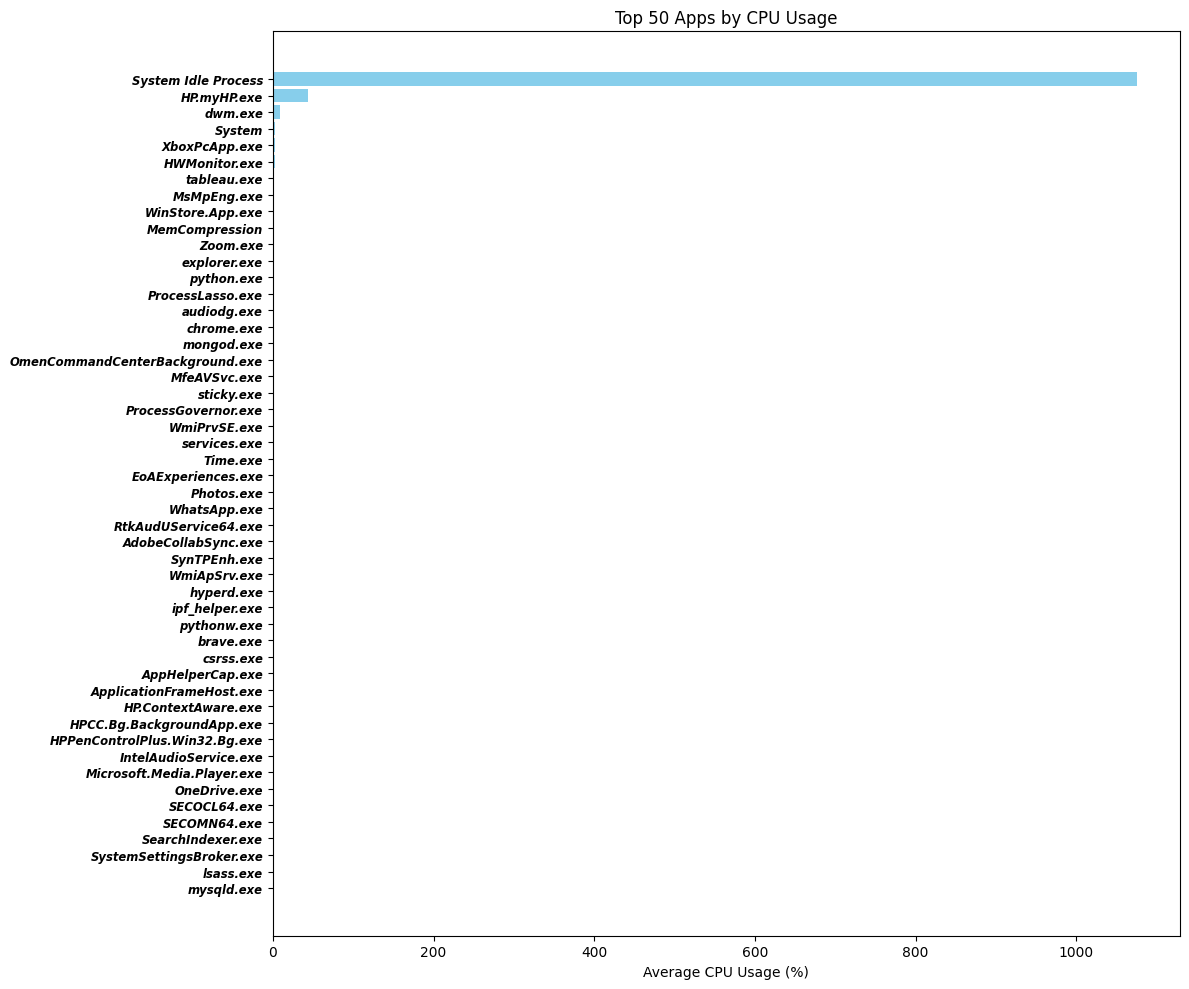

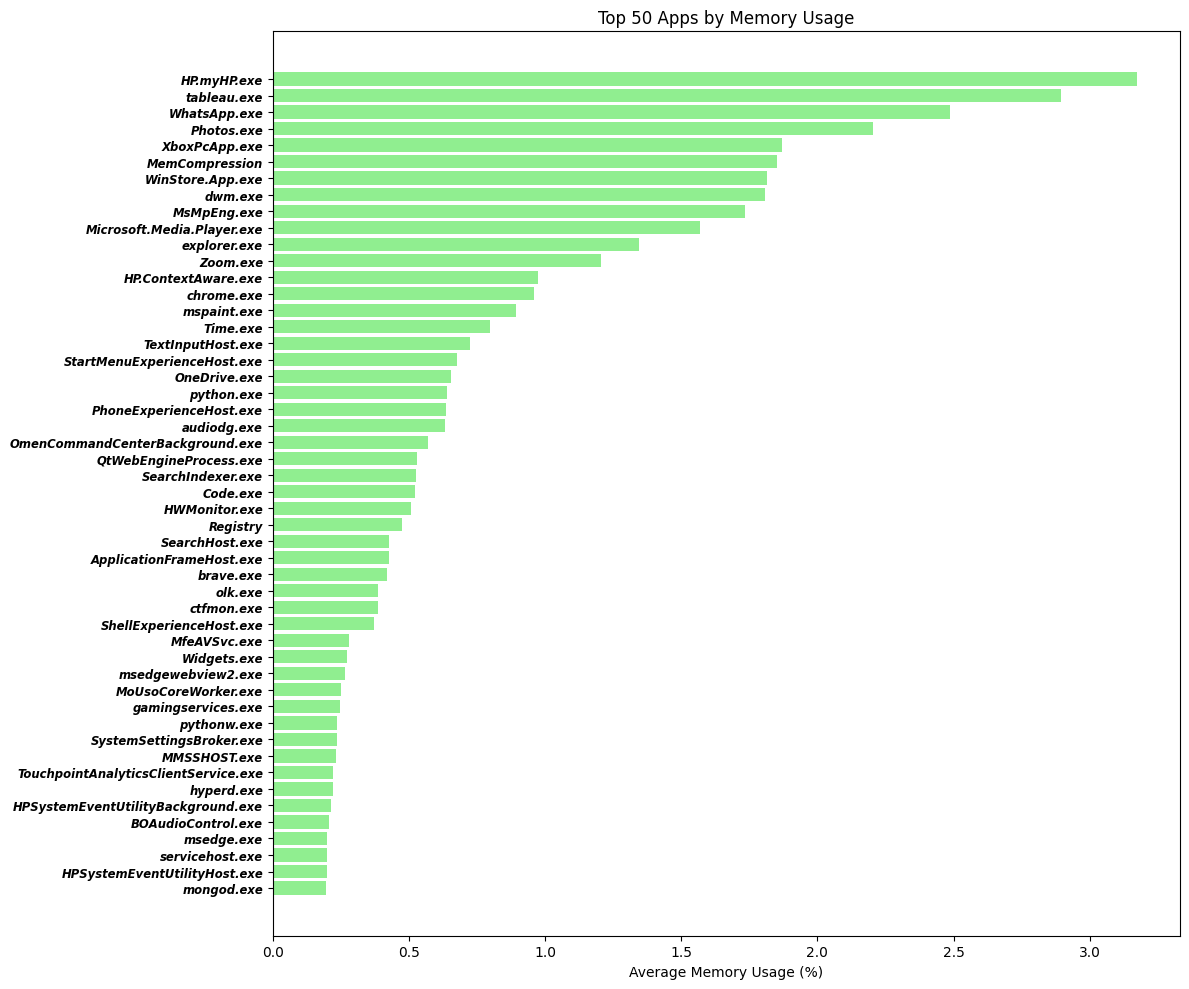

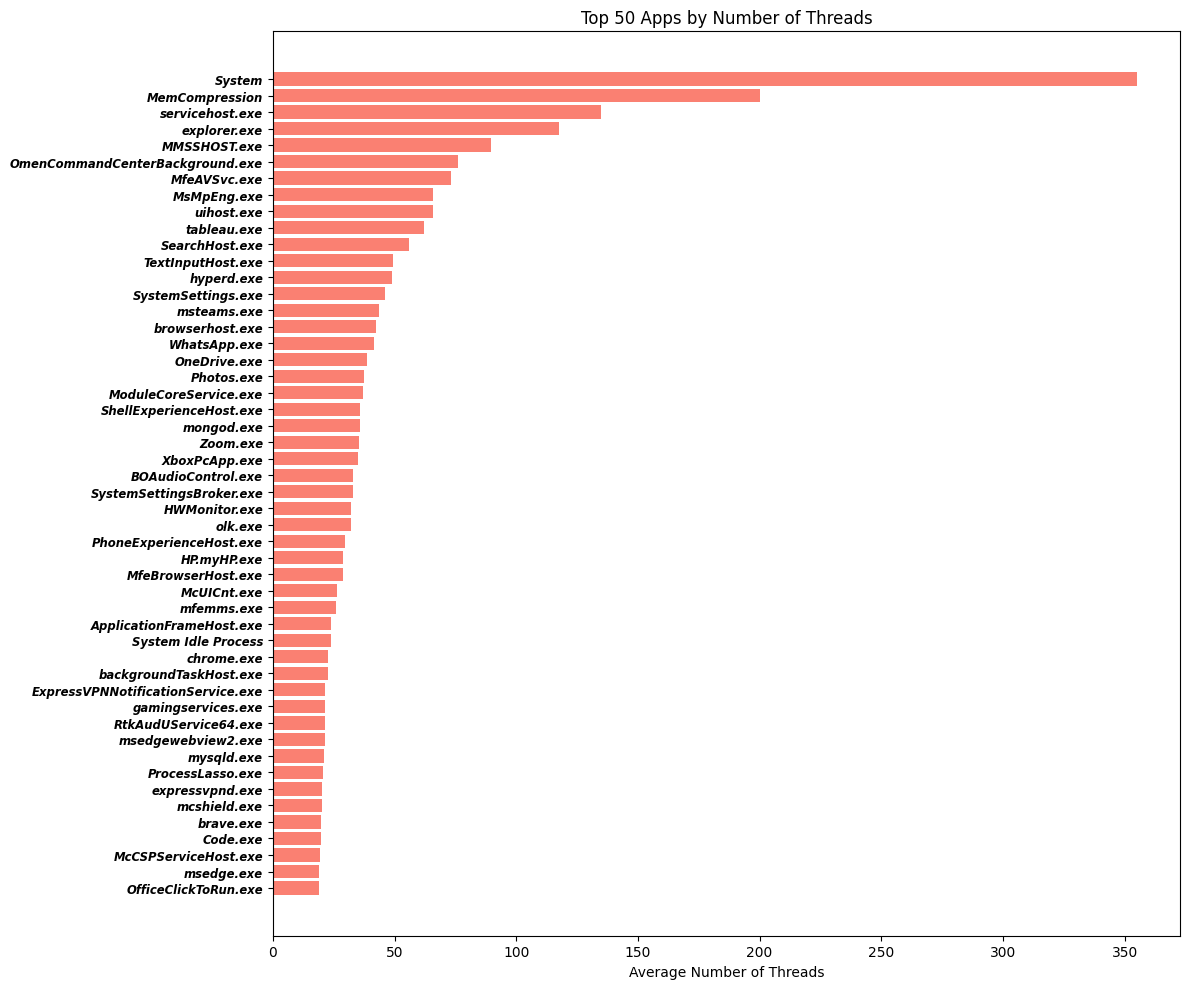

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV into a pandas DataFrame
df = pd.read_csv('/content/70% limit data.csv')

# Group by application and calculate average CPU, memory usage, and number of threads
app_stats = df.groupby('app_name').agg({
    'app_cpu_percent': 'mean',
    'app_memory_percent': 'mean',
    'app_num_threads': 'mean'
}).reset_index()

# Sort by CPU usage to find top 50 apps
top_50_cpu = app_stats.nlargest(50, 'app_cpu_percent')

# Sort by memory usage to find top 50 apps
top_50_memory = app_stats.nlargest(50, 'app_memory_percent')

# Sort by number of threads to find top 50 apps
top_50_threads = app_stats.nlargest(50, 'app_num_threads')

# Function to adjust application names for neat display
def adjust_labels(ax):
    for tick in ax.get_yticklabels():
        tick.set_fontsize('small')
        tick.set_fontweight('bold')
        tick.set_fontstyle('italic')

# Plotting top 50 apps by CPU Usage
plt.figure(figsize=(12, 10))
plt.barh(top_50_cpu['app_name'], top_50_cpu['app_cpu_percent'], color='skyblue')
plt.xlabel('Average CPU Usage (%)')
plt.title('Top 50 Apps by CPU Usage')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest usage at the top
adjust_labels(plt.gca())
plt.tight_layout()
plt.show()

# Plotting top 50 apps by Memory Usage
plt.figure(figsize=(12, 10))
plt.barh(top_50_memory['app_name'], top_50_memory['app_memory_percent'], color='lightgreen')
plt.xlabel('Average Memory Usage (%)')
plt.title('Top 50 Apps by Memory Usage')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest usage at the top
adjust_labels(plt.gca())
plt.tight_layout()
plt.show()

# Plotting top 50 apps by Number of Threads
plt.figure(figsize=(12, 10))
plt.barh(top_50_threads['app_name'], top_50_threads['app_num_threads'], color='salmon')
plt.xlabel('Average Number of Threads')
plt.title('Top 50 Apps by Number of Threads')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest number of threads at the top
adjust_labels(plt.gca())
plt.tight_layout()
plt.show()


In [ ]:
import psutil
import time
import csv
from datetime import datetime
def get_battery_status():
    battery = psutil.sensors_battery()
    if battery is not None:
        return battery.percent
    return None

def get_system_usage():
    cpu_usage = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()
    disk_info = psutil.disk_usage('/')
    network_info = psutil.net_io_counters()

    system_usage = {
        'cpu_usage_percent': cpu_usage,
        'memory_total': memory_info.total,
        'memory_available': memory_info.available,
        'memory_percent': memory_info.percent,
        'disk_total': disk_info.total,
        'disk_used': disk_info.used,
        'disk_free': disk_info.free,
        'disk_percent': disk_info.percent,
        'bytes_sent': network_info.bytes_sent,
        'bytes_recv': network_info.bytes_recv
    }

    return system_usage

def get_app_usage():
    app_usage = []
    for proc in psutil.process_iter(['pid', 'name', 'cpu_percent']):
        try:
            app_usage.append({
                'pid': proc.info['pid'],
                'name': proc.info['name'],
                'cpu_percent': proc.info['cpu_percent'],
                'memory_percent': proc.memory_percent(),
                'cpu_time': proc.cpu_times(),
                'num_threads': proc.num_threads()
            })
        except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
            pass
    return app_usage

def main():
    with open('/content/50%limit data.csv', 'w', newline='') as csvfile:
        fieldnames = [
            'timestamp', 'battery_percent',
            'cpu_usage_percent', 'memory_total', 'memory_available', 'memory_percent',
            'disk_total', 'disk_used', 'disk_free', 'disk_percent', 'bytes_sent', 'bytes_recv',
            'pid', 'app_name', 'app_cpu_percent', 'app_memory_percent', 'app_cpu_time', 'app_num_threads'
        ]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        row_count = 0
        while row_count < 500:  # Ensure at least 500 rows are collected
            # Check the overall CPU usage
            system_cpu_usage = psutil.cpu_percent(interval=1)
            if system_cpu_usage > 50:
                print(f"CPU usage is high: {system_cpu_usage}%. Sleeping to reduce load...")
                time.sleep(10)  # Sleep for 10 seconds to reduce CPU load
                continue

            timestamp = datetime.now().isoformat()
            battery_percent = get_battery_status()
            system_usage = get_system_usage()
            app_usage = get_app_usage()

            for app in app_usage:
                writer.writerow({
                    'timestamp': timestamp,
                    'battery_percent': battery_percent if battery_percent is not None else 'N/A',
                    'cpu_usage_percent': system_usage['cpu_usage_percent'],
                    'memory_total': system_usage['memory_total'],
                    'memory_available': system_usage['memory_available'],
                    'memory_percent': system_usage['memory_percent'],
                    'disk_total': system_usage['disk_total'],
                    'disk_used': system_usage['disk_used'],
                    'disk_free': system_usage['disk_free'],
                    'disk_percent': system_usage['disk_percent'],
                    'bytes_sent': system_usage['bytes_sent'],
                    'bytes_recv': system_usage['bytes_recv'],
                    'pid': app['pid'],
                    'app_name': app['name'],
                    'app_cpu_percent': app['cpu_percent'],
                    'app_memory_percent': app['memory_percent'],
                    'app_cpu_time': app['cpu_time'],
                    'app_num_threads': app['num_threads']
                })
                row_count += 1
            time.sleep(60)  # Collect data every 60 seconds

if __name__ == '__main__':
    main()


In [35]:
data="/content/50%limit data.csv"
df2=pd.read_csv(data)
df2

,timestamp,battery_percent,cpu_usage_percent,memory_total,memory_available,memory_percent,disk_total,disk_used,disk_free,disk_percent,bytes_sent,bytes_recv,pid,app_name,app_cpu_percent,app_memory_percent,app_cpu_time,app_num_threads
0,2024-07-14T19:02:22.908,28,8.9,16876888064,1514811392,91.0,255529578496,255486337024,43241472,100,88621914,561128741,0,System Idle Process,1110.7,0.000049,"pcputimes(user=0.0, system=456284.76562499994,...",24
1,2024-07-14T19:02:22.908,28,8.9,16876888064,1514811392,91.0,255529578496,255486337024,43241472,100,88621914,561128741,4,System,2.2,0.023809,"pcputimes(user=0.0, system=1055.0, children_us...",352
2,2024-07-14T19:02:22.908,28,8.9,16876888064,1514811392,91.0,255529578496,255486337024,43241472,100,88621914,561128741,140,NaN,0.0,0.287016,"pcputimes(user=0.0, system=0.0, children_user=...",0
3,2024-07-14T19:02:22.908,28,8.9,16876888064,1514811392,91.0,255529578496,255486337024,43241472,100,88621914,561128741,172,Registry,0.0,0.473263,"pcputimes(user=0.0, system=1.6875, children_us...",4
4,2024-07-14T19:02:22.908,28,8.9,16876888064,1514811392,91.0,255529578496,255486337024,43241472,100,88621914,561128741,640,python.exe,0.0,0.788698,"pcputimes(user=0.6875, system=0.515625, childr...",18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,2024-07-14T19:03:44.569,27,14.1,16876888064,627511296,96.3,255529578496,255456456704,73121792,100,90201261,581824193,38820,brave.exe,0.0,0.053151,"pcputimes(user=0.015625, system=0.015625, chil...",8
818,2024-07-14T19:03:44.569,27,14.1,16876888064,627511296,96.3,255529578496,255456456704,73121792,100,90201261,581824193,38828,brave.exe,0.0,0.134285,"pcputimes(user=0.03125, system=0.125, children...",12
819,2024-07-14T19:03:44.569,27,14.1,16876888064,627511296,96.3,255529578496,255456456704,73121792,100,90201261,581824193,39740,msedgewebview2.exe,0.0,0.105550,"pcputimes(user=0.015625, system=0.03125, child...",8
820,2024-07-14T19:03:44.569,27,14.1,16876888064,627511296,96.3,255529578496,255456456704,73121792,100,90201261,581824193,40384,chrome.exe,0.0,1.466580,"pcputimes(user=5.671875, system=1.1875, childr...",30


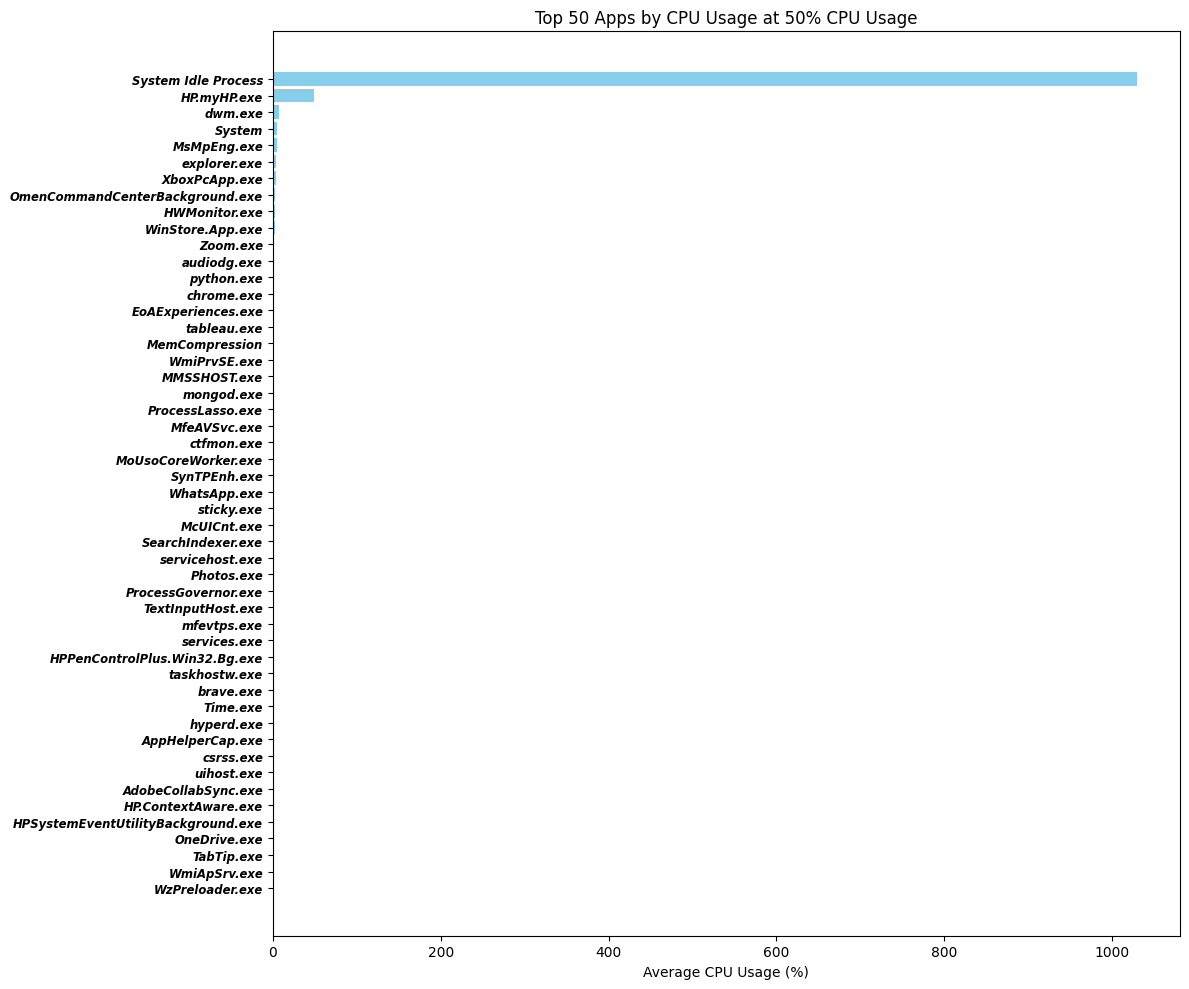

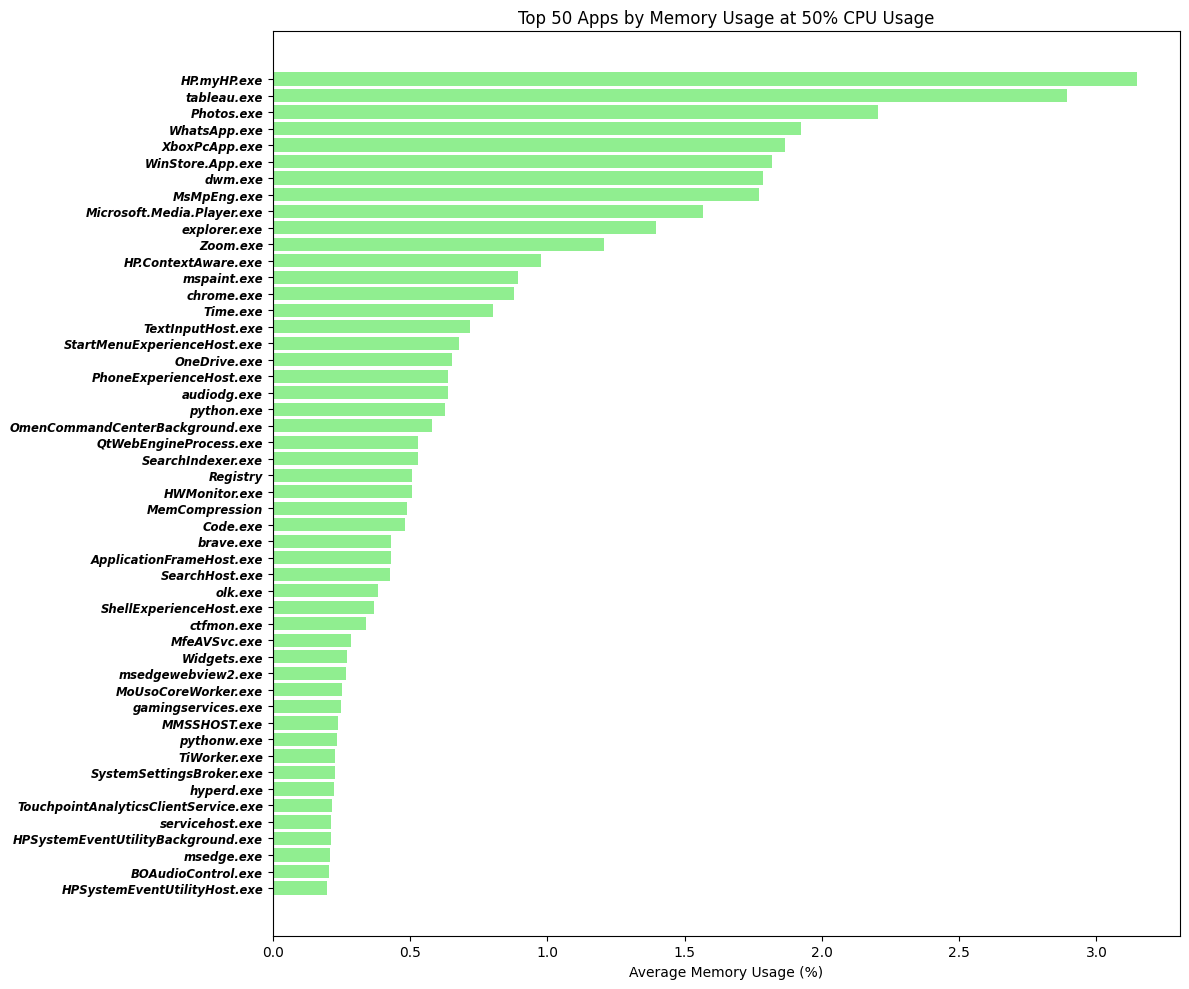

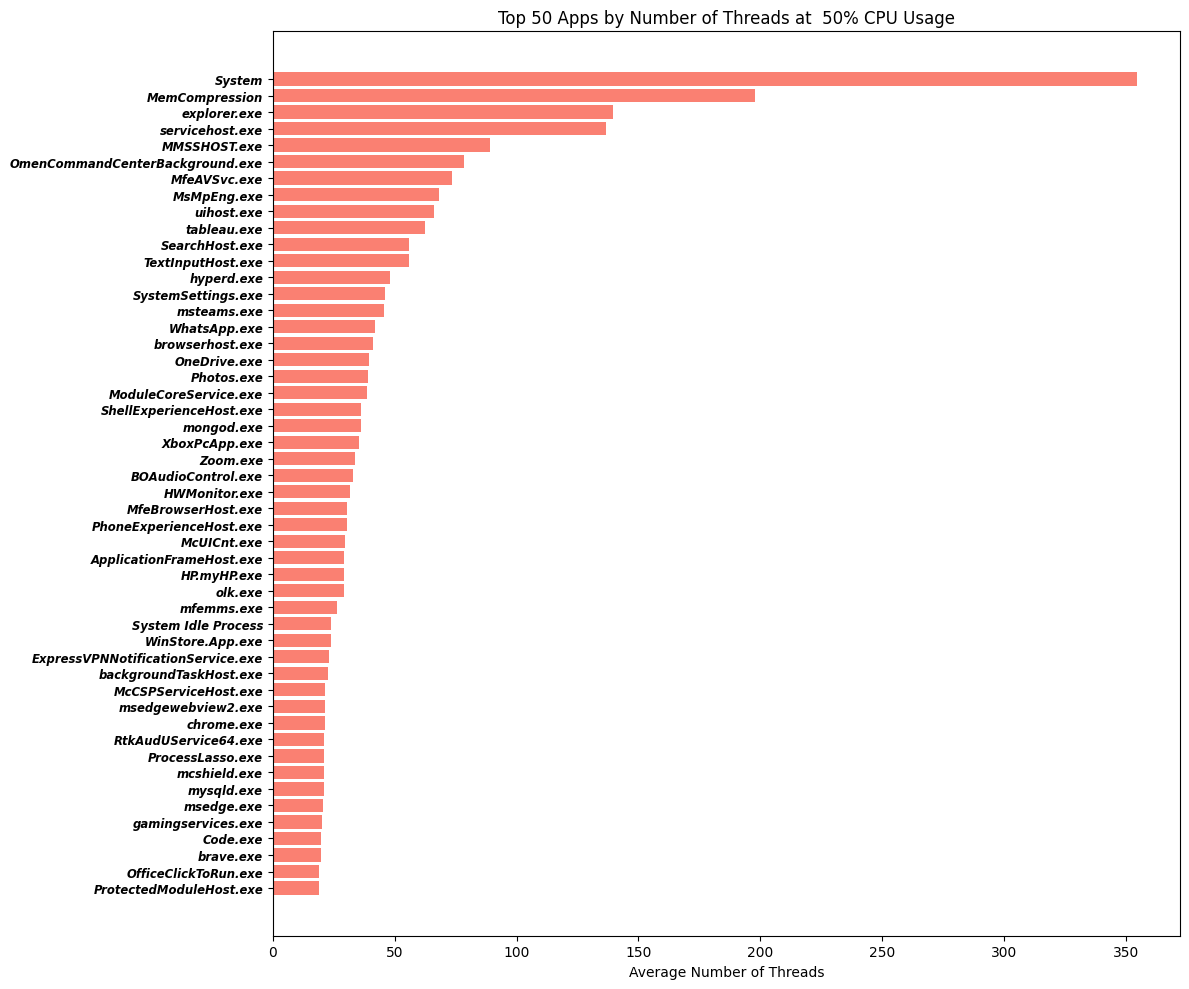

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV into a pandas DataFrame
df = pd.read_csv('/content/50%limit data.csv')

# Filter data for 50% CPU usage
df_50_cpu = df[df['cpu_usage_percent'] <= 50]

# Group by application and calculate average CPU, memory usage, and number of threads
app_stats = df_50_cpu.groupby('app_name').agg({
    'app_cpu_percent': 'mean',
    'app_memory_percent': 'mean',
    'app_num_threads': 'mean'
}).reset_index()

# Sort by CPU usage to find top 50 apps
top_50_cpu = app_stats.nlargest(50, 'app_cpu_percent')

# Sort by memory usage to find top 50 apps
top_50_memory = app_stats.nlargest(50, 'app_memory_percent')

# Sort by number of threads to find top 50 apps
top_50_threads = app_stats.nlargest(50, 'app_num_threads')

# Function to adjust application names for neat display
def adjust_labels(ax):
    for tick in ax.get_yticklabels():
        tick.set_fontsize('small')
        tick.set_fontweight('bold')
        tick.set_fontstyle('italic')

# Plotting top 50 apps by CPU Usage at 50% usage
plt.figure(figsize=(12, 10))
plt.barh(top_50_cpu['app_name'], top_50_cpu['app_cpu_percent'], color='skyblue')
plt.xlabel('Average CPU Usage (%)')
plt.title('Top 50 Apps by CPU Usage at 50% CPU Usage')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest usage at the top
adjust_labels(plt.gca())
plt.tight_layout()
plt.show()

# Plotting top 50 apps by Memory Usage at 50% usage
plt.figure(figsize=(12, 10))
plt.barh(top_50_memory['app_name'], top_50_memory['app_memory_percent'], color='lightgreen')
plt.xlabel('Average Memory Usage (%)')
plt.title('Top 50 Apps by Memory Usage at 50% CPU Usage')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest usage at the top
adjust_labels(plt.gca())
plt.tight_layout()
plt.show()

# Plotting top 50 apps by Number of Threads at 50% usage
plt.figure(figsize=(12, 10))
plt.barh(top_50_threads['app_name'], top_50_threads['app_num_threads'], color='salmon')
plt.xlabel('Average Number of Threads')
plt.title('Top 50 Apps by Number of Threads at  50% CPU Usage')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest number of threads at the top
adjust_labels(plt.gca())
plt.tight_layout()
plt.show()


In [ ]:
import psutil
import time
import csv
from datetime import datetime

def get_battery_status():
    battery = psutil.sensors_battery()
    if battery is not None:
        return battery.percent
    return None

def get_system_usage():
    cpu_usage = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()
    disk_info = psutil.disk_usage('/')
    network_info = psutil.net_io_counters()

    system_usage = {
        'cpu_usage_percent': cpu_usage,
        'memory_total': memory_info.total,
        'memory_available': memory_info.available,
        'memory_percent': memory_info.percent,
        'disk_total': disk_info.total,
        'disk_used': disk_info.used,
        'disk_free': disk_info.free,
        'disk_percent': disk_info.percent,
        'bytes_sent': network_info.bytes_sent,
        'bytes_recv': network_info.bytes_recv
    }

    return system_usage

def get_app_usage():
    app_usage = []
    for proc in psutil.process_iter(['pid', 'name', 'cpu_percent']):
        try:
            app_usage.append({
                'pid': proc.info['pid'],
                'name': proc.info['name'],
                'cpu_percent': proc.info['cpu_percent'],
                'memory_percent': proc.memory_percent(),
                'cpu_time': proc.cpu_times(),
                'num_threads': proc.num_threads()
            })
        except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
            pass
    return app_usage

def main():
    with open('/content/30%limit data.csv', 'w', newline='') as csvfile:
        fieldnames = [
            'timestamp', 'battery_percent',
            'cpu_usage_percent', 'memory_total', 'memory_available', 'memory_percent',
            'disk_total', 'disk_used', 'disk_free', 'disk_percent', 'bytes_sent', 'bytes_recv',
            'pid', 'app_name', 'app_cpu_percent', 'app_memory_percent', 'app_cpu_time', 'app_num_threads'
        ]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        row_count = 0
        while row_count < 500:  # Ensure at least 500 rows are collected
            timestamp = datetime.now().isoformat()
            battery_percent = get_battery_status()
            system_usage = get_system_usage()
            app_usage = get_app_usage()

            for app in app_usage:
                writer.writerow({
                    'timestamp': timestamp,
                    'battery_percent': battery_percent if battery_percent is not None else 'N/A',
                    'cpu_usage_percent': system_usage['cpu_usage_percent'],
                    'memory_total': system_usage['memory_total'],
                    'memory_available': system_usage['memory_available'],
                    'memory_percent': system_usage['memory_percent'],
                    'disk_total': system_usage['disk_total'],
                    'disk_used': system_usage['disk_used'],
                    'disk_free': system_usage['disk_free'],
                    'disk_percent': system_usage['disk_percent'],
                    'bytes_sent': system_usage['bytes_sent'],
                    'bytes_recv': system_usage['bytes_recv'],
                    'pid': app['pid'],
                    'app_name': app['name'],
                    'app_cpu_percent': app['cpu_percent'],
                    'app_memory_percent': app['memory_percent'],
                    'app_cpu_time': app['cpu_time'],
                    'app_num_threads': app['num_threads']
                })
                row_count += 1
            time.sleep(60)  # Collect data every 60 seconds

if __name__ == '__main__':
    main()


In [37]:
data="/content/30%limit data.csv"
df3=pd.read_csv(data)
df3

,timestamp,battery_percent,cpu_usage_percent,memory_total,memory_available,memory_percent,disk_total,disk_used,disk_free,disk_percent,bytes_sent,bytes_recv,pid,app_name,app_cpu_percent,app_memory_percent,app_cpu_time,app_num_threads
0,2024-07-14T19:06:37.077,23,12.2,16876888064,1077313536,93.6,255529578496,255460036608,69541888,100,92450769,593040577,0,System Idle Process,1008.0,0.000049,"pcputimes(user=0.0, system=458797.859375, chil...",24
1,2024-07-14T19:06:37.077,23,12.2,16876888064,1077313536,93.6,255529578496,255460036608,69541888,100,92450769,593040577,4,System,5.7,0.023882,"pcputimes(user=0.0, system=1071.8125, children...",354
2,2024-07-14T19:06:37.077,23,12.2,16876888064,1077313536,93.6,255529578496,255460036608,69541888,100,92450769,593040577,140,NaN,0.0,0.287016,"pcputimes(user=0.0, system=0.0, children_user=...",0
3,2024-07-14T19:06:37.077,23,12.2,16876888064,1077313536,93.6,255529578496,255460036608,69541888,100,92450769,593040577,172,Registry,0.0,0.407807,"pcputimes(user=0.0, system=1.71875, children_u...",4
4,2024-07-14T19:06:37.077,23,12.2,16876888064,1077313536,93.6,255529578496,255460036608,69541888,100,92450769,593040577,640,python.exe,0.0,0.587477,"pcputimes(user=0.6875, system=0.515625, childr...",18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,2024-07-14T19:07:58.335,22,17.2,16876888064,1002229760,94.1,255529578496,255462350848,67227648,100,93364595,593690632,38828,brave.exe,0.0,0.134018,"pcputimes(user=0.03125, system=0.125, children...",10
819,2024-07-14T19:07:58.335,22,17.2,16876888064,1002229760,94.1,255529578496,255462350848,67227648,100,93364595,593690632,39016,chrome.exe,0.0,0.422708,"pcputimes(user=0.109375, system=0.09375, child...",20
820,2024-07-14T19:07:58.335,22,17.2,16876888064,1002229760,94.1,255529578496,255462350848,67227648,100,93364595,593690632,39740,msedgewebview2.exe,0.0,0.105428,"pcputimes(user=0.015625, system=0.03125, child...",7
821,2024-07-14T19:07:58.335,22,17.2,16876888064,1002229760,94.1,255529578496,255462350848,67227648,100,93364595,593690632,40384,chrome.exe,5.2,1.397945,"pcputimes(user=15.578125, system=2.59375, chil...",30


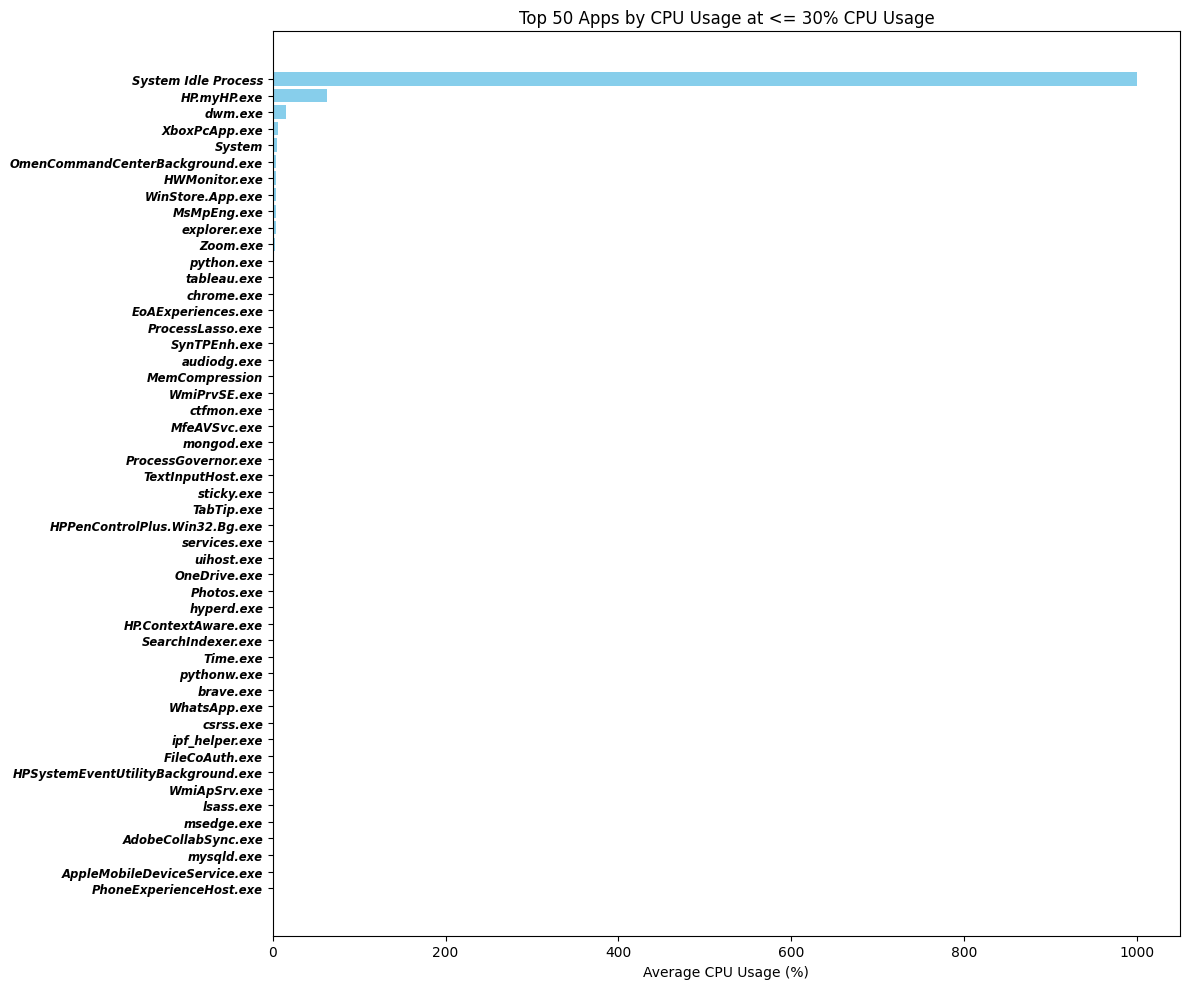

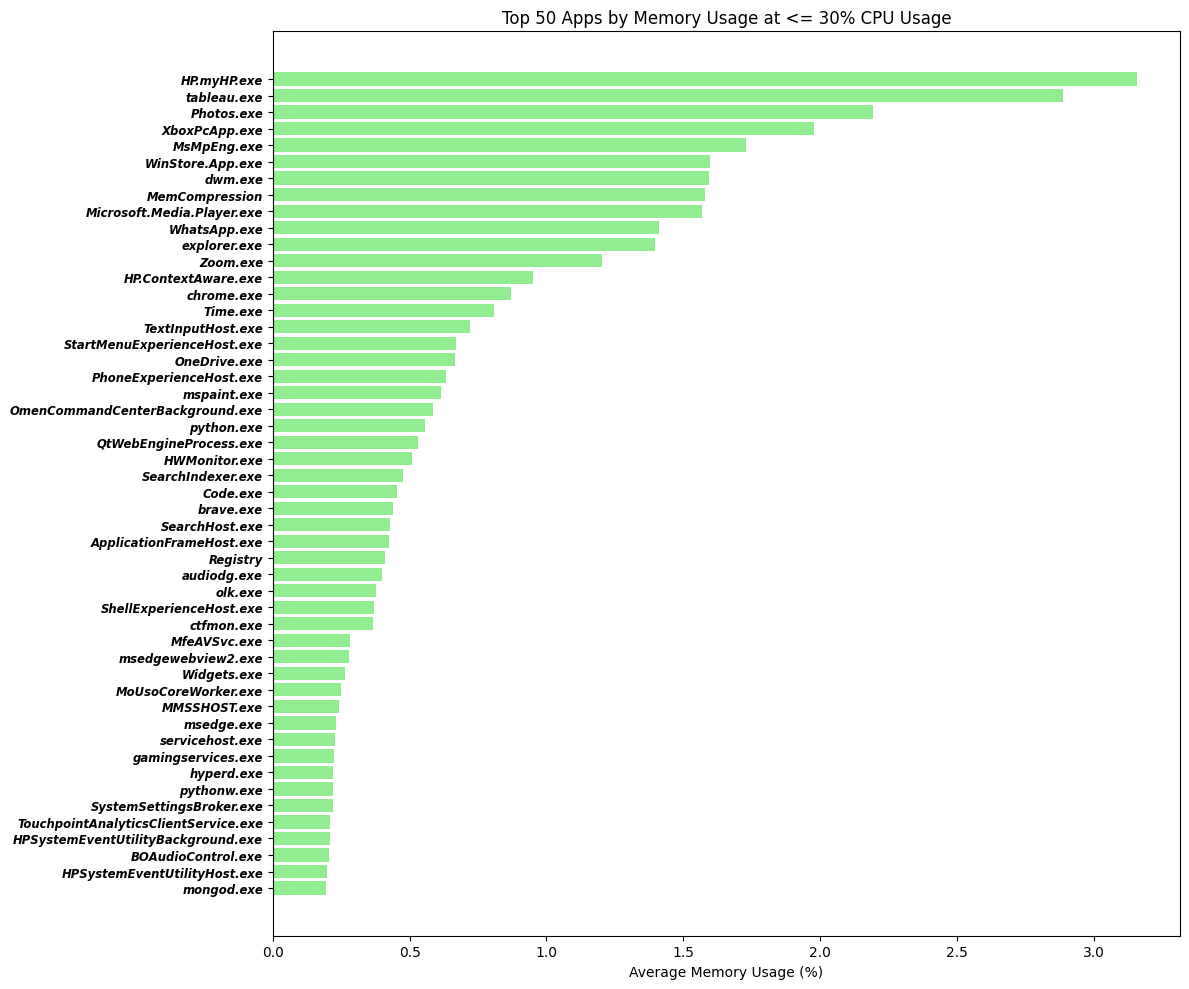

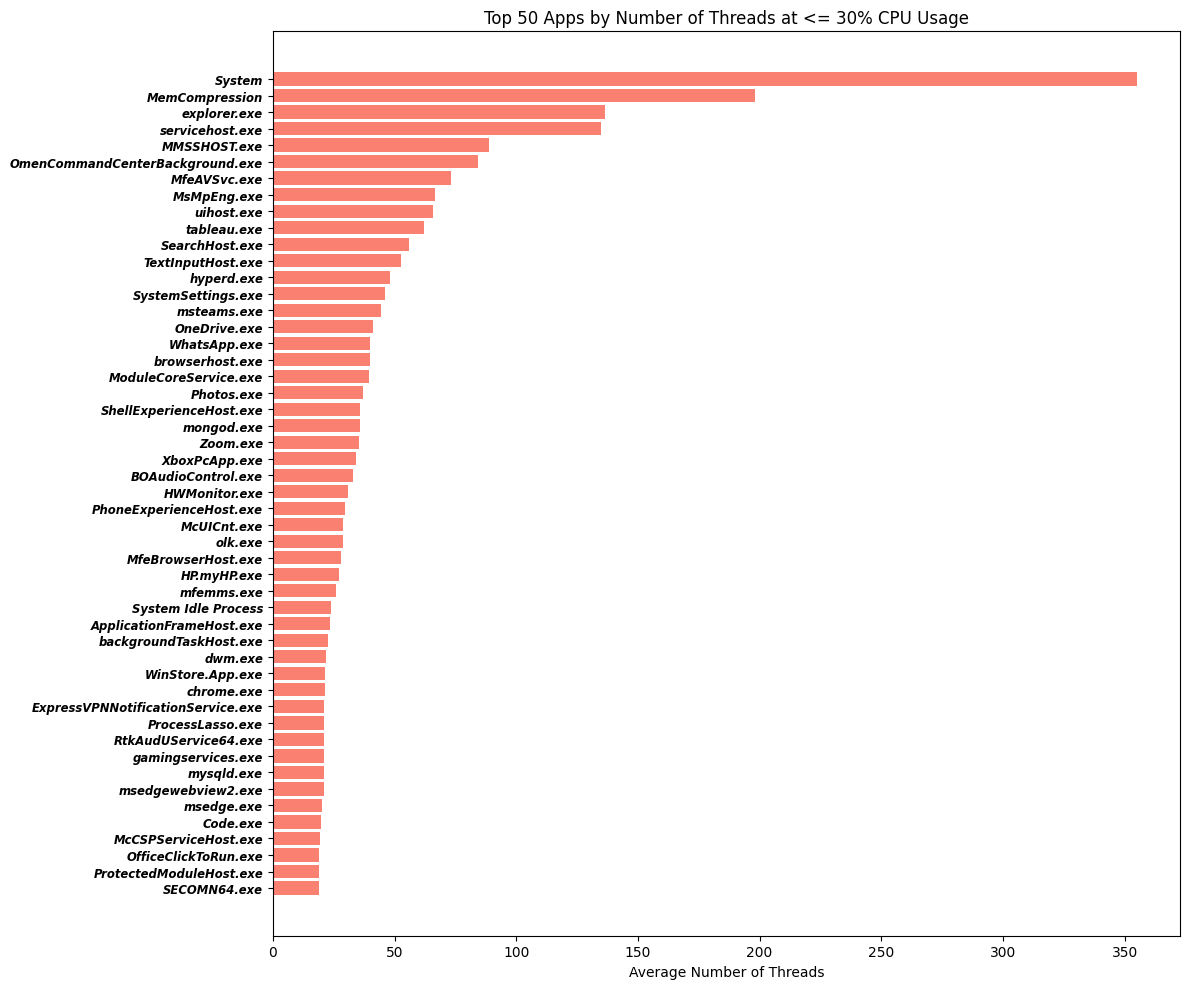

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV into a pandas DataFrame
df = pd.read_csv('/content/30%limit data.csv')

# Filter data for 30% CPU usage or lower
df_30_cpu = df[df['cpu_usage_percent'] <= 30]

# Group by application and calculate average CPU, memory usage, and number of threads
app_stats = df_30_cpu.groupby('app_name').agg({
    'app_cpu_percent': 'mean',
    'app_memory_percent': 'mean',
    'app_num_threads': 'mean'
}).reset_index()

# Sort by CPU usage to find top 50 apps
top_50_cpu = app_stats.nlargest(50, 'app_cpu_percent')

# Sort by memory usage to find top 50 apps
top_50_memory = app_stats.nlargest(50, 'app_memory_percent')

# Sort by number of threads to find top 50 apps
top_50_threads = app_stats.nlargest(50, 'app_num_threads')

# Function to adjust application names for neat display
def adjust_labels(ax):
    for tick in ax.get_yticklabels():
        tick.set_fontsize('small')
        tick.set_fontweight('bold')
        tick.set_fontstyle('italic')

# Plotting top 50 apps by CPU Usage at 30% usage
plt.figure(figsize=(12, 10))
plt.barh(top_50_cpu['app_name'], top_50_cpu['app_cpu_percent'], color='skyblue')
plt.xlabel('Average CPU Usage (%)')
plt.title('Top 50 Apps by CPU Usage at <= 30% CPU Usage')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest usage at the top
adjust_labels(plt.gca())
plt.tight_layout()
plt.show()

# Plotting top 50 apps by Memory Usage at 30% usage
plt.figure(figsize=(12, 10))
plt.barh(top_50_memory['app_name'], top_50_memory['app_memory_percent'], color='lightgreen')
plt.xlabel('Average Memory Usage (%)')
plt.title('Top 50 Apps by Memory Usage at <= 30% CPU Usage')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest usage at the top
adjust_labels(plt.gca())
plt.tight_layout()
plt.show()

# Plotting top 50 apps by Number of Threads at 30% usage
plt.figure(figsize=(12, 10))
plt.barh(top_50_threads['app_name'], top_50_threads['app_num_threads'], color='salmon')
plt.xlabel('Average Number of Threads')
plt.title('Top 50 Apps by Number of Threads at <= 30% CPU Usage')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest number of threads at the top
adjust_labels(plt.gca())
plt.tight_layout()
plt.show()


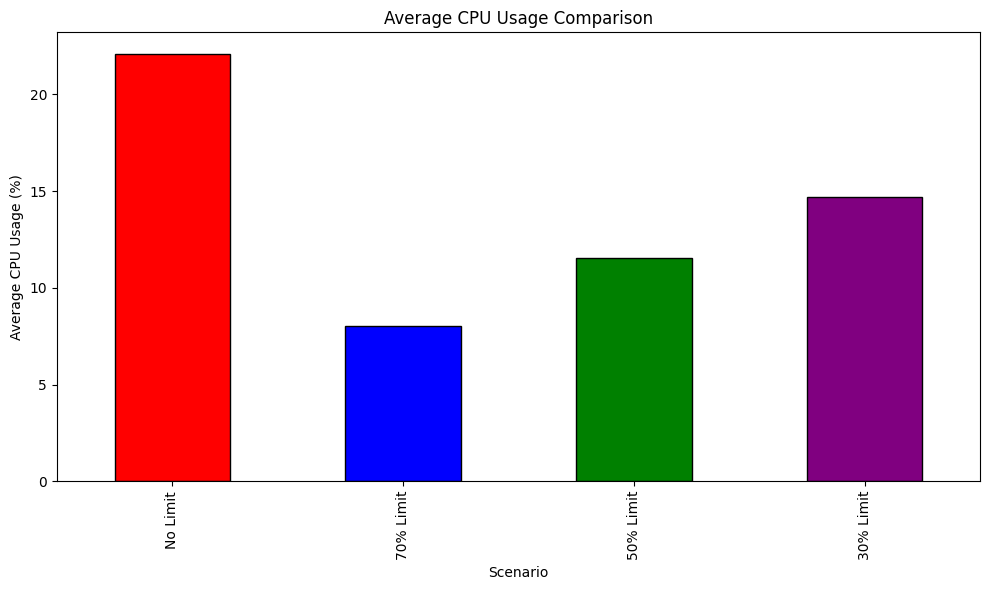

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

def read_csv(file_name):
    return pd.read_csv(file_name)

def summarize_cpu_usage(df):
    summary = {
        'avg_cpu_usage_percent': df['cpu_usage_percent'].mean()
    }
    return summary

if __name__ == '__main__':
    # File names of the collected data
    file_names = {
        'No Limit': '/content/initial 100% data.csv',
        '70% Limit': '/content/70% limit data.csv',
        '50% Limit': '/content/50%limit data.csv',
        '30% Limit': '/content/30%limit data.csv'
    }

    summaries = {}

    # Read and summarize CPU usage data for each file
    for label, file_name in file_names.items():
        df = read_csv(file_name)
        summaries[label] = summarize_cpu_usage(df)

    # Convert summaries to a DataFrame for easier plotting
    df_summary = pd.DataFrame(summaries)

    # Transpose DataFrame for plotting
    df_summary = df_summary.T

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot average CPU usage
    df_summary['avg_cpu_usage_percent'].plot(kind='bar', ax=ax, color=['red', 'blue', 'green', 'purple'], edgecolor='black')

    ax.set_title('Average CPU Usage Comparison')
    ax.set_xlabel('Scenario')
    ax.set_ylabel('Average CPU Usage (%)')

    # Show plot
    plt.tight_layout()
    plt.show()


In [40]:
import pandas as pd

def read_csv(file_name):
    return pd.read_csv(file_name)

def summarize_data(df):
    summary = {
        'total_rows': len(df),
        'avg_cpu_usage_percent': df['cpu_usage_percent'].mean(),
        'avg_memory_percent': df['memory_percent'].mean(),
        'avg_disk_percent': df['disk_percent'].mean(),
        'avg_bytes_sent': df['bytes_sent'].mean(),
        'avg_bytes_recv': df['bytes_recv'].mean()
    }
    return summary

def compare_data(summaries):
    comparison = pd.DataFrame(summaries).T
    return comparison

if __name__ == '__main__':
    # File names of the collected data
    file_names = {
        'No Limit': '/content/initial 100% data.csv',
        '70% Limit': '/content/70% limit data.csv',
        '50% Limit': '/content/50%limit data.csv',
        '30% Limit': '/content/30%limit data.csv'
    }

    summaries = {}

    for key, file_name in file_names.items():
        df = read_csv(file_name)
        summaries[key] = summarize_data(df)

    comparison = compare_data(summaries)
    print(comparison)

    # Save comparison to a CSV file
    comparison.to_csv('comparison_summary.csv', index=True)


           total_rows  avg_cpu_usage_percent  avg_memory_percent  \
No Limit        828.0              22.107971           96.703865   
70% Limit       818.0               8.044010           94.600733   
50% Limit       822.0              11.518978           93.669343   
30% Limit       823.0              14.709113           93.850911   

           avg_disk_percent  avg_bytes_sent  avg_bytes_recv  
No Limit              100.0    8.618411e+07    5.094381e+08  
70% Limit             100.0    8.755841e+07    5.450146e+08  
50% Limit             100.0    8.941735e+07    5.715520e+08  
30% Limit             100.0    9.290935e+07    5.933668e+08  


In [41]:
import pandas as pd
new_data="/content/comparison_summary.csv"
comparison_data=pd.read_csv(new_data)
comparison_data

,Unnamed: 0,total_rows,avg_cpu_usage_percent,avg_memory_percent,avg_disk_percent,avg_bytes_sent,avg_bytes_recv
0,No Limit,828.0,22.107971,96.703865,100.0,8.618411e+07,5.094381e+08
1,70% Limit,818.0,8.044010,94.600733,100.0,8.755841e+07,5.450146e+08
2,50% Limit,822.0,11.518978,93.669343,100.0,8.941735e+07,5.715520e+08
3,30% Limit,823.0,14.709113,93.850911,100.0,9.290935e+07,5.933668e+08


CPU Usage Level: No Limit
Mean: 22.11
Median: 25.40
Std_dev: 3.30

CPU Usage Level: 70% Limit
Mean: 8.04
Median: 5.60
Std_dev: 2.45

CPU Usage Level: 50% Limit
Mean: 11.52
Median: 14.10
Std_dev: 2.60

CPU Usage Level: 30% Limit
Mean: 14.71
Median: 17.20
Std_dev: 2.50



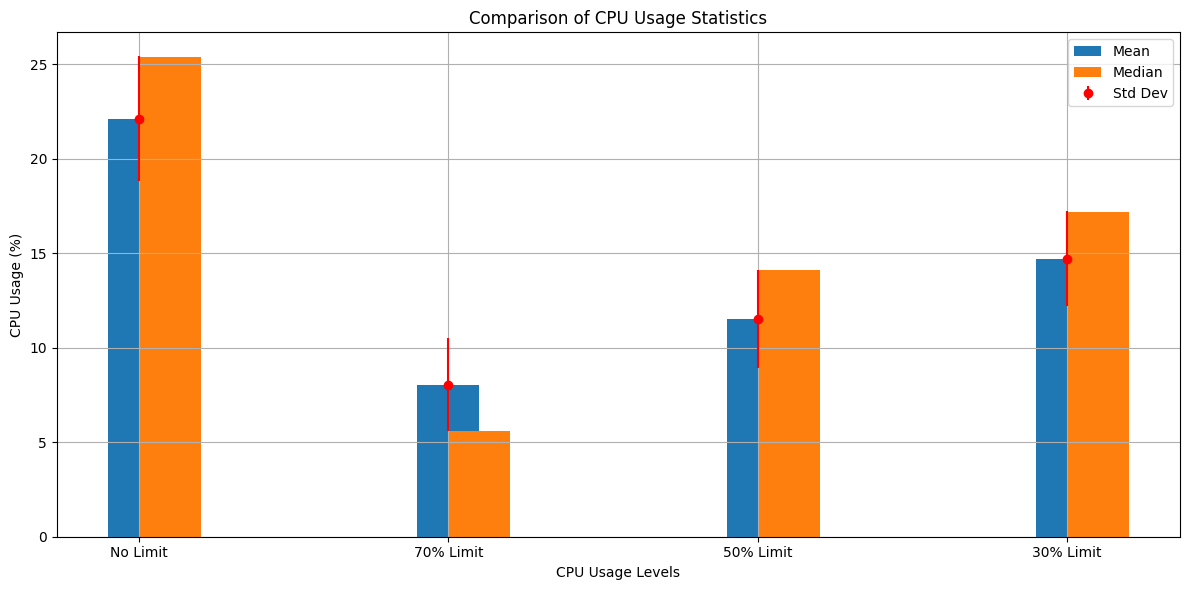

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to read data from CSV
def read_data(file_path):
    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    return df

# Function to analyze data and get summary statistics
def analyze_data(df):
    summary = {
        'mean': df['cpu_usage_percent'].mean(),
        'median': df['cpu_usage_percent'].median(),
        'std_dev': df['cpu_usage_percent'].std()
    }
    return summary

# Function to generate summary report for different CPU usage levels
def generate_summary_report(data_files):
    summary_report = {}
    for usage_level, file_path in data_files.items():
        df = read_data(file_path)
        summary_report[usage_level] = analyze_data(df)
    return summary_report

# Function to visualize the summary statistics
def visualize_summary(summary_report):
    labels = list(summary_report.keys())
    means = [summary_report[label]['mean'] for label in labels]
    medians = [summary_report[label]['median'] for label in labels]
    std_devs = [summary_report[label]['std_dev'] for label in labels]

    x = range(len(labels))

    plt.figure(figsize=(12, 6))
    plt.bar(x, means, width=0.2, label='Mean', align='center')
    plt.bar(x, medians, width=0.2, label='Median', align='edge')
    plt.errorbar(x, means, yerr=std_devs, fmt='o', color='r', label='Std Dev')

    plt.xlabel('CPU Usage Levels')
    plt.ylabel('CPU Usage (%)')
    plt.title('Comparison of CPU Usage Statistics')
    plt.xticks(x, labels)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Main function
def main():
    # Dictionary with CPU usage levels and corresponding file paths
    data_files = {
        'No Limit': '/content/initial 100% data.csv',
        '70% Limit': '/content/70% limit data.csv',
        '50% Limit': '/content/50%limit data.csv',
        '30% Limit': '/content/30%limit data.csv'
    }

    # Generate summary report
    summary_report = generate_summary_report(data_files)
    for usage_level, stats in summary_report.items():
        print(f'CPU Usage Level: {usage_level}')
        print(f"Mean: {stats['mean']:.2f}")
        print(f"Median: {stats['median']:.2f}")
        print(f"Std_dev: {stats['std_dev']:.2f}")
        print()

    # Visualize summary
    visualize_summary(summary_report)

if __name__ == '__main__':
    main()


In [43]:
import pandas as pd
import numpy as np

# Function to read data from CSV
def read_data(file_path):
    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    return df

# Function to analyze data and get summary statistics
def analyze_data(df):
    summary = {
        'mean': df['cpu_usage_percent'].mean(),
        'median': df['cpu_usage_percent'].median(),
        'std_dev': df['cpu_usage_percent'].std()
    }
    return summary

# Function to generate summary report for different CPU usage levels
def generate_summary_report(data_files):
    summary_report = {}
    for usage_level, file_path in data_files.items():
        df = read_data(file_path)
        summary_report[usage_level] = analyze_data(df)
    return summary_report

# Main function
def main():
    # Dictionary with CPU usage levels and corresponding file paths
    data_files = {
        'No Limit': '/content/initial 100% data.csv',
        '70% Limit': '/content/70% limit data.csv',
        '50% Limit': '/content/50%limit data.csv',
        '30% Limit': '/content/30%limit data.csv'
    }

    # Generate summary report
    summary_report = generate_summary_report(data_files)
    for usage_level, stats in summary_report.items():
        print(f'CPU Usage Level: {usage_level}')
        print(f"Mean: {stats['mean']:.2f}")
        print(f"Median: {stats['median']:.2f}")
        print(f"Std_dev: {stats['std_dev']:.2f}")
        print()

if __name__ == '__main__':
    main()


CPU Usage Level: No Limit
Mean: 22.11
Median: 25.40
Std_dev: 3.30

CPU Usage Level: 70% Limit
Mean: 8.04
Median: 5.60
Std_dev: 2.45

CPU Usage Level: 50% Limit
Mean: 11.52
Median: 14.10
Std_dev: 2.60

CPU Usage Level: 30% Limit
Mean: 14.71
Median: 17.20
Std_dev: 2.50



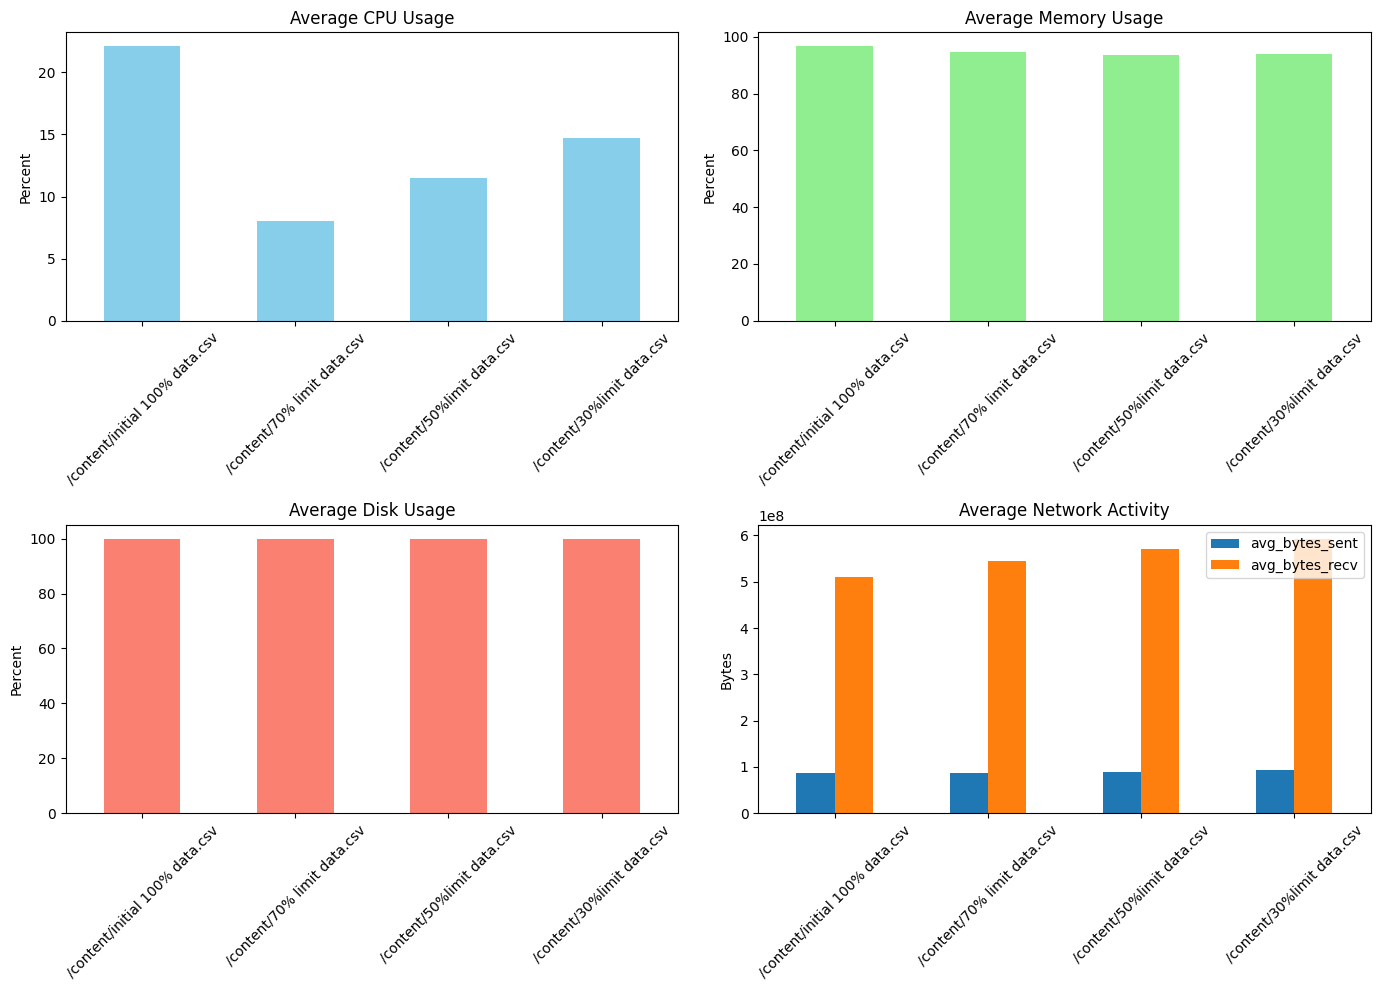

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

def read_csv(file_name):
    return pd.read_csv(file_name)

def summarize_data(df):
    summary = {
        'avg_cpu_usage_percent': df['cpu_usage_percent'].mean(),
        'avg_memory_percent': df['memory_percent'].mean(),
        'avg_disk_percent': df['disk_percent'].mean(),
        'avg_bytes_sent': df['bytes_sent'].mean(),
        'avg_bytes_recv': df['bytes_recv'].mean()
    }
    return summary

if __name__ == '__main__':
    # File names of the collected data
    file_names = [
        '/content/initial 100% data.csv',
        '/content/70% limit data.csv',
        '/content/50%limit data.csv',
        '/content/30%limit data.csv'
    ]

    summaries = {}

    # Read and summarize data for each file
    for file_name in file_names:
        df = read_csv(file_name)
        summaries[file_name] = summarize_data(df)

    # Convert summaries to a DataFrame for easier plotting
    df_summary = pd.DataFrame(summaries).T

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

    # Average CPU usage plot
    df_summary['avg_cpu_usage_percent'].plot(kind='bar', ax=axes[0, 0], rot=45, color='skyblue')
    axes[0, 0].set_title('Average CPU Usage')
    axes[0, 0].set_ylabel('Percent')

    # Average Memory usage plot
    df_summary['avg_memory_percent'].plot(kind='bar', ax=axes[0, 1], rot=45, color='lightgreen')
    axes[0, 1].set_title('Average Memory Usage')
    axes[0, 1].set_ylabel('Percent')

    # Average Disk usage plot
    df_summary['avg_disk_percent'].plot(kind='bar', ax=axes[1, 0], rot=45, color='salmon')
    axes[1, 0].set_title('Average Disk Usage')
    axes[1, 0].set_ylabel('Percent')

    # Average Network activity plot
    df_summary[['avg_bytes_sent', 'avg_bytes_recv']].plot(kind='bar', ax=axes[1, 1], rot=45)
    axes[1, 1].set_title('Average Network Activity')
    axes[1, 1].set_ylabel('Bytes')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()
